# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston = pd.read_csv('C:/Users/ACER/Desktop/Data Analysis/Labs/lab-problems-in-ml/data/boston_data.csv')
boston.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
5,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39,34.9
6,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56,26.2
7,0.26938,0.0,9.90,0.0,0.544,6.266,82.8,3.2628,4.0,304.0,18.4,393.39,7.90,21.6
8,10.06230,0.0,18.10,0.0,0.584,6.833,94.3,2.0882,24.0,666.0,20.2,81.33,19.69,14.1
9,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

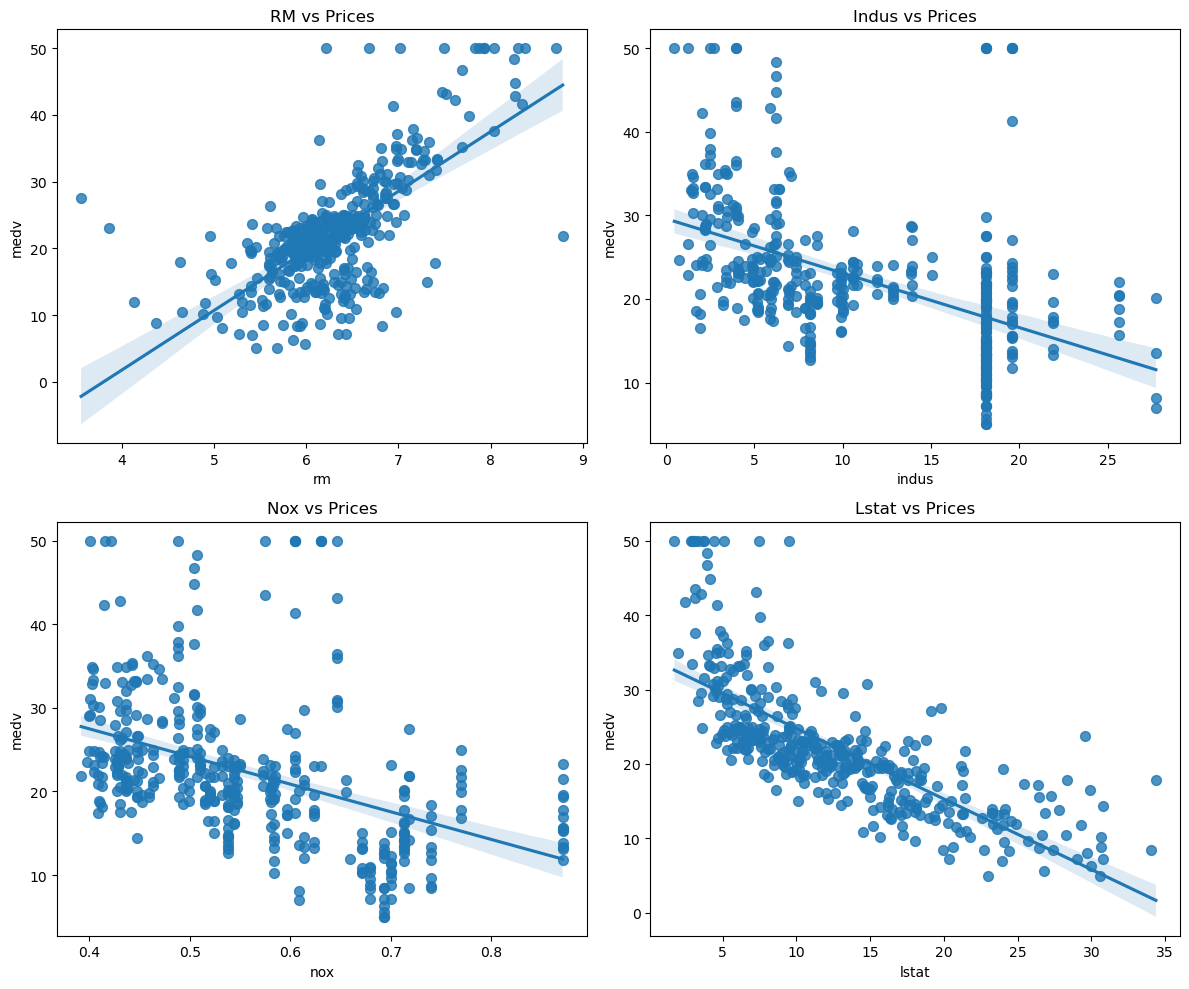

In [4]:
# Your plots here
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create scatter plots with regression lines
sns.regplot(ax=axes[0, 0], x='rm', y='medv', data=boston, scatter_kws={"s": 50})
axes[0, 0].set_title('RM vs Prices')

sns.regplot(ax=axes[0, 1], x='indus', y='medv', data=boston, scatter_kws={"s": 50})
axes[0, 1].set_title('Indus vs Prices')

sns.regplot(ax=axes[1, 0], x='nox', y='medv', data=boston, scatter_kws={"s": 50})
axes[1, 0].set_title('Nox vs Prices')

sns.regplot(ax=axes[1, 1], x='lstat', y='medv', data=boston, scatter_kws={"s": 50})
axes[1, 1].set_title('Lstat vs Prices')

plt.tight_layout()

plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
# Plots are very dispersed and there are a lot of outliers. For room numbers and lower status there is a
# definite trend where more rooms mean higher prices and lower status mean lower prices

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

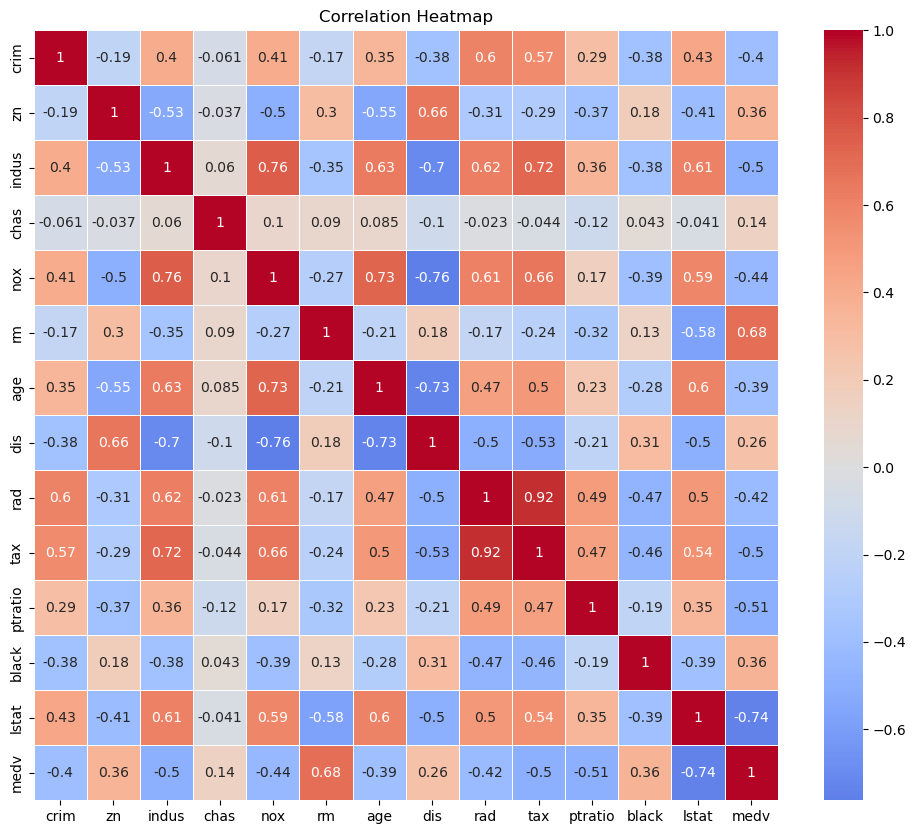

In [7]:
# Your response here
correlation_matrix = boston.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [9]:
# Your code here
housing_prices = boston['medv']

# Calculate descriptive statistics
price_min = np.min(housing_prices)
price_max = np.max(housing_prices)
price_mean = np.mean(housing_prices)
price_median = np.median(housing_prices)
price_std = np.std(housing_prices)

# Print the results
print("Min Price:", price_min)
print("Max Price:", price_max)
print("Mean", price_mean)
print("Median", price_median)
print("SD", price_std)

Min Price: 5.0
Max Price: 50.0
Mean 22.312376237623763
Median 21.4
SD 8.82607496591717


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [10]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    score = r2_score(y_true, y_predict)
    return score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [12]:
# Your code here
from sklearn.model_selection import train_test_split

X = boston.drop(columns=['medv'])
y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [15]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

max_depths = [2, 4, 6, 8, 10]

# Dictionary to store R² scores for different max_depths
r2_scores = {}

for max_depth in max_depths:
    # Create and train the Random Forest Regressor
    model = RandomForestRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores[max_depth] = r2

Now, plot the score for each tree on the training set and on the testing set.

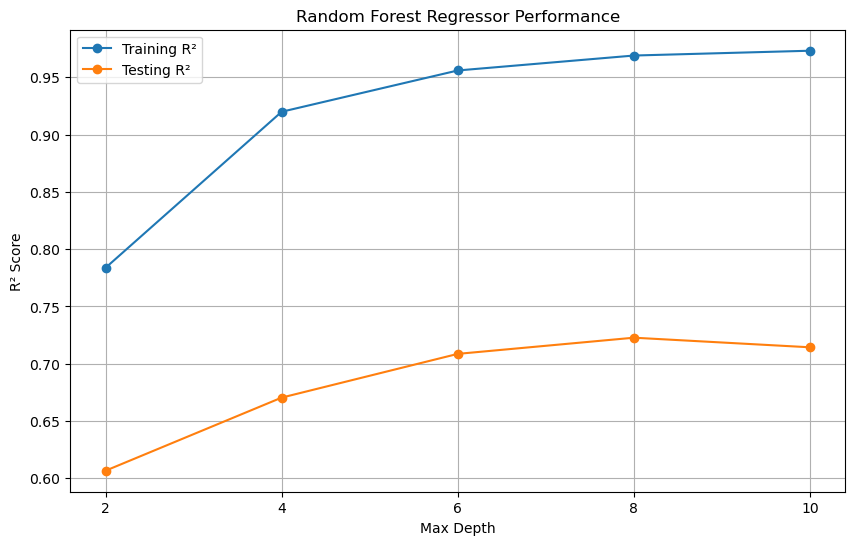

In [16]:
# Produce a plot with the score for the testing and training for the different max depths

max_depths = list(r2_scores.keys())
r2_scores_test = list(r2_scores.values())

# Create Random Forest Regressor models with the same max_depth values for training R² scores
r2_scores_train = []

for max_depth in max_depths:
    model = RandomForestRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    r2_scores_train.append(r2_score(y_train, y_train_pred))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_depths, r2_scores_train, marker='o', label='Training R²')
plt.plot(max_depths, r2_scores_test, marker='o', label='Testing R²')
plt.title('Random Forest Regressor Performance')
plt.xlabel('Max Depth')
plt.ylabel('R² Score')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
# The deeper the tree, the better is the accuracy. When training, from 2 to 4 depth, there is a huge
# spike in accuracy from ~78% to 92% and afterwards little by little it goes up. 

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# Your response here
# When the model is trained with a max depth of 1, usually there is high bias and low variance which may
# also result in underfitting and vice versa, max depth of 10 results in low bias and high variance which
# may lead to overfitting.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here
# Looks like from depth 8 to 10 it gives the same accuracy of ~98% which is very high

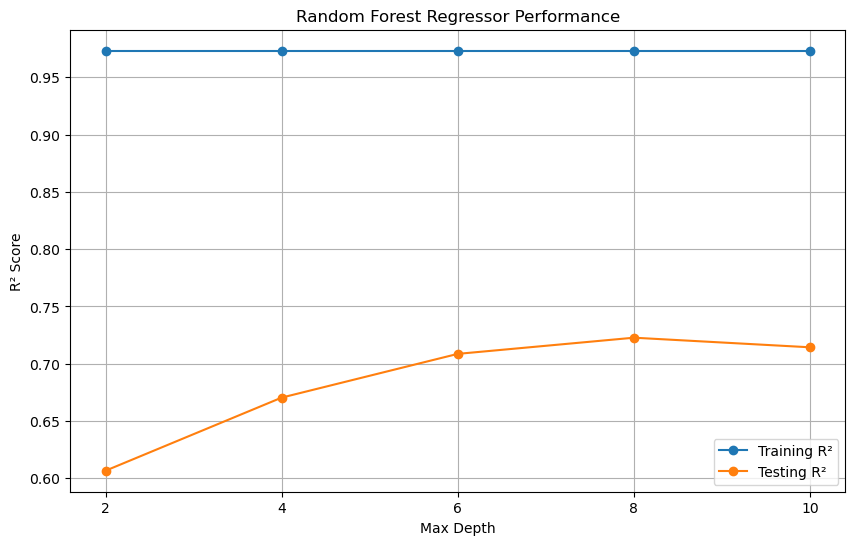

In [24]:
r2_scores_train = []

for max_depth in max_depths:
    model = RandomForestRegressor(max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    r2_scores_train.append(r2_score(y_train, y_train_pred))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_depths, r2_scores_train, marker='o', label='Training R²')
plt.plot(max_depths, r2_scores_test, marker='o', label='Testing R²')
plt.title('Random Forest Regressor Performance')
plt.xlabel('Max Depth')
plt.ylabel('R² Score')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
# It is probably not relevant today due to changes in the housing market, economy, lifestyle changes, and other factors over time. 
# While the features in this dataset are relevant, modern housing prices could be influenced by features, such as distance to public transport, energy efficiency, home automation, and neighborhood amenities.
# The model's performance needs to be tested rigorously on a wide variety of data to determine its robustness. One dataset can't predict its robustness
# As there would be differences in demographics, economical condition and real estate in general it might not be applicable